# How expected value can mislead you

## What is expected value?

**Expected Value** is just a way of applying the concept of a weighted average to a random event.  You might use a weighted average to find your final score in a class when the homework is worth 40% of your grade and exams are worth 60%.  In the same way, you might use a weighted average to find the expected value of an investment or how much you expect to win or lose while playing a game.

## Expected value examples

### A standard six-sided die

#### Calculating expected value

If I wanted to work out the expected value of rolling a standard six-sided die (1D6), I just multiply each roll by how likely it is, and add them up.

$$
\frac{1}{6} \times 1 + \frac{1}{6} \times 2 + \frac{1}{6} \times 3 + \frac{1}{6} \times 4 + \frac{1}{6} \times 5 + \frac{1}{6} \times 6
$$
$$
\frac{1}{6} \times \left( 1+2+3+4+5+6 \right)
$$
$$
\frac{1}{6} \times 21
$$
$$
\frac{7}{2}
$$
$$
3.5
$$

#### Verifying expected value

Can I verify that the average value of the die is what I calculated?  Sure.  With the help of my robot friends, it's no trouble at all to roll even a million six-sided dice and find the average.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from numpy.random import default_rng
rng = default_rng()

In [3]:
roll_count = 1_000_000

In [4]:
die_size = 6

In [5]:
die_roll_df = pd.DataFrame(rng.integers(1, die_size, size=roll_count, endpoint=True), index=np.arange(1, roll_count+1), columns=["value"])
die_roll_df.index.name="roll"

In [6]:

die_roll_counts_df = die_roll_df["value"].value_counts(sort=False)

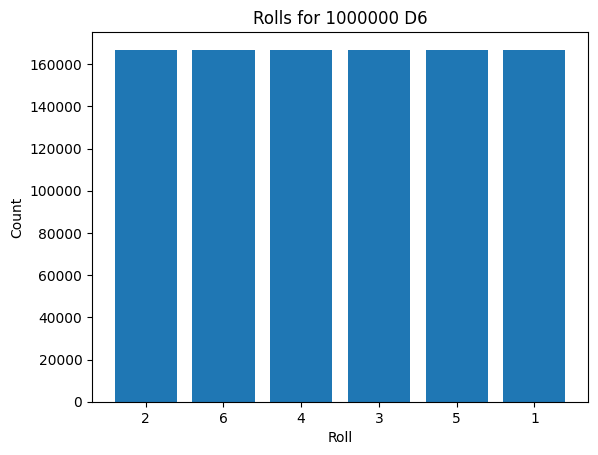

In [7]:

fig, ax = plt.subplots()
ax.bar(die_roll_counts_df.index.astype(str), die_roll_counts_df)
ax.set_xlabel("Roll")
ax.set_ylabel("Count")
ax.set_title(f"Rolls for {roll_count:n} D{die_size:n}")
plt.show()

In [8]:
die_roll_mean = die_roll_df['value'].mean()
display(f"The average of {roll_count:n} rolls of a d{die_size:n} is {die_roll_mean:g}")

'The average of 1000000 rolls of a d6 is 3.49976'

### A non-standard 6 sided die

A standard die is a pretty easy case.  Each value is equally likely so it's not even really necessary to do the math the long way.  Does this apporach work even for non-standard dice?  Let's try it.

Imagine I took at six sided die and re-labeled the faces.  I'll put a 1 on the first three faces, a 2 on the faces that originally said 4 and 5, and a 3 on the face that said 6.  How do I calculate the expected value of this new, weighted die, and do observations agree with calculations?


#### Calculating expected value

$$
\frac{3}{6} \times 1 + \frac{2}{6} \times 2 + \frac{1}{6} \times 3
$$
$$
\frac{3}{6} + \frac{4}{6} + \frac{3}{6}
$$
$$
\frac{{10}}{6}
$$
$$
\frac{5}{3}
$$
$$
1.\overline 6 
$$


#### Verifying expected value

In [9]:
die_faces = np.array([1,1,1,2,2,3])

In [10]:
weighted_rolls_df =pd.DataFrame(rng.choice(die_faces, size=roll_count), index=np.arange(1, roll_count+1), columns=["value"])
weighted_rolls_df.columns.name="roll"

In [11]:
weighted_roll_counts_df = weighted_rolls_df["value"].value_counts(sort=False)
weighted_roll_counts_df.index

Int64Index([1, 2, 3], dtype='int64')

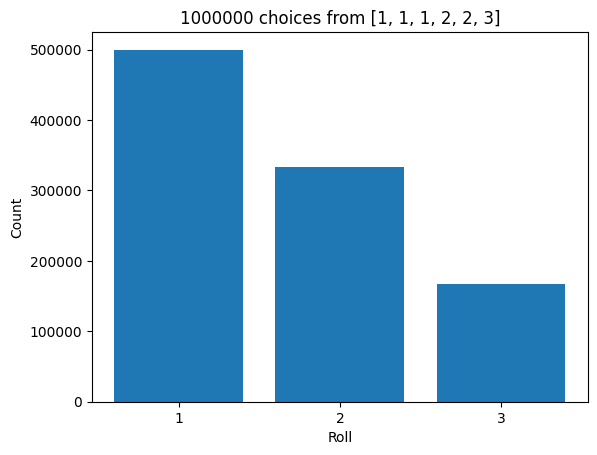

In [12]:
fig, ax = plt.subplots()
ax.bar(weighted_roll_counts_df.index.astype(str), weighted_roll_counts_df.array)
ax.set_xlabel("Roll")
ax.set_ylabel("Count")
ax.set_title(f"{roll_count:n} choices from {die_faces.tolist()}")
plt.show()

In [13]:
weighted_roll_mean = weighted_rolls_df['value'].mean()
display(f"The average of {roll_count:n} choices from {die_faces.tolist()} is {weighted_roll_mean:g}")

'The average of 1000000 choices from [1, 1, 1, 2, 2, 3] is 1.66719'

## What do I use expected value to do?